**Write a program for to implement Rule based system.**

In [ ]:
import spacy


# import the matcher
from spacy.matcher import Matcher

#load a model and create the nlp object
nlp = spacy.load('en_core_web_sm')

#Initialize the matcher with the shared vocab

matcher = Matcher(nlp.vocab)

In [ ]:
# add the pattern to the matcher
pattern = [{'ORTH':'iPhone'}, {'ORTH':'X'}]
matcher.add('IPHONE_PATTERN', None, pattern)

In [ ]:
# process some text
doc = nlp("New iPhone X release date leaked")

In [ ]:
#call the matcher on the doc

matches= matcher(doc)

# iterate over the matches
for match_id, start, end in matches:
  #get the matched span
  matched_span = doc[start:end]
  print(matched_span.text)


iPhone X


In [ ]:
# complex pattern Matching the lexical Attributes

pattern = [
           {'IS_DIGIT': True},
           {'LOWER':'fifa'},
           {'LOWER':'world'},
           {'LOWER':'cup'},
           {'IS_PUNCT':True}
]
matcher.add('FIFA_WORLD_CUP', None, pattern)
doc= nlp("2018 FIFA World Cup: France won!!!! ")
matches = matcher(doc)


# iterate over the matches
for match_id, start, end in matches:
  #get the matched span
  matched_span = doc[start:end]
  print(matched_span.text)


2018 FIFA World Cup:


In [ ]:
# Matching other token attributes

pattern = [
           {'LEMMA':'love', 'POS':'VERB'},
           {'POS':'NOUN'}
]
matcher.add('LEMA_NOUN', None, pattern)
doc= nlp("I loved dogs but now I love cats more.")
matches = matcher(doc)


# iterate over the matches
for match_id, start, end in matches:
  #get the matched span
  matched_span = doc[start:end]
  print(matched_span.text)

loved dogs
love cats


In [ ]:
# Using operators and quantifiers

pattern = [
           {'LEMMA':'buy'},
           {'POS':'DET','OP':'?'}, # optional: match 0 or 1 times
           {'POS':'NOUN'}
]
matcher.add('OPERATOR_QUANTIFIER', None, pattern)
doc = nlp("I bought a smartphone. Now I'm buying apps.")
matches = matcher(doc)

# iterate over the matches
for match_id, start, end in matches:
  #get the matched span
  matched_span = doc[start:end]
  print(matched_span.text)

bought a smartphone
buying apps


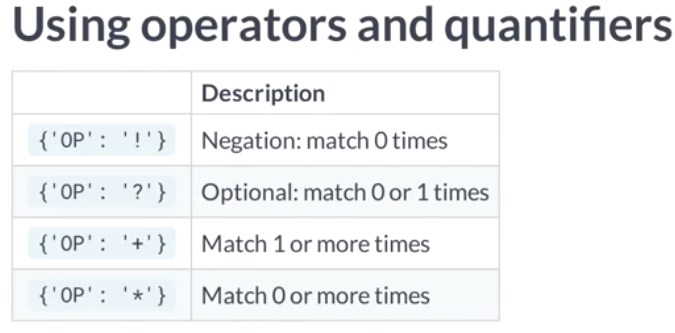